In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Set the paths to the dataset folders
plain_folder = '/content/drive/MyDrive/NIST/sd300a/images/500/png/plain'
roll_folder = '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll'

# Set hyperparameters
input_shape = (256, 256, 1)
batch_size = 1
epochs = 10
learning_rate = 0.001

In [3]:
# Function to load and preprocess an image
def load_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(input_shape[:2])  # Resize to input shape
    image = np.array(image)  # Convert to numpy array
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

In [4]:
# Generate pairs of plain and roll fingerprint images
def generate_pairs(plain_folder, roll_folder):
    plain_images = os.listdir(plain_folder)
    roll_images = os.listdir(roll_folder)
    pairs = []
    labels = []
    matchCount=0
    NotmatchCount=0

    for plain_image in plain_images:
        if(matchCount==2000):
          break
        plain_image_temp=plain_image.split('.')[0]
        plain_id = plain_image_temp.split('_')[0]
        end_id =plain_image_temp.split('_')[3]
        roll_image = [roll_image for roll_image in roll_images if roll_image.split('.')[0].startswith(plain_id) and roll_image.split('.')[0].endswith(end_id)]

        if len(roll_image) > 0:
            roll_image = random.choice(roll_image)
            plain_path = os.path.join(plain_folder, plain_image)
            roll_path = os.path.join(roll_folder, roll_image)
            pairs.append([plain_path, roll_path])
            labels.append(1)  # Positive pair
            matchCount=matchCount+1
    print(plain_id)
    print(end_id)
    for plain_image in plain_images:
        if(NotmatchCount==2000):
          break
        plain_image_temp=plain_image.split('.')[0]
        plain_id = plain_image_temp.split('_')[0]
        end_id =plain_image_temp.split('_')[3]
        impostor_roll_images = [roll_image for roll_image in roll_images if not roll_image.startswith(plain_id) and not roll_image.split('.')[0].endswith(end_id)]
        if len(impostor_roll_images) > 0:
            impostor_roll_image = random.choice(impostor_roll_images)
            plain_path = os.path.join(plain_folder, plain_image)
            impostor_roll_path = os.path.join(roll_folder, impostor_roll_image)
            pairs.append([plain_path, impostor_roll_path])
            labels.append(0)  # Negative pair
            NotmatchCount=NotmatchCount+1
    return pairs, labels

In [5]:
pairs, labels=generate_pairs(plain_folder, roll_folder)

00001134
02


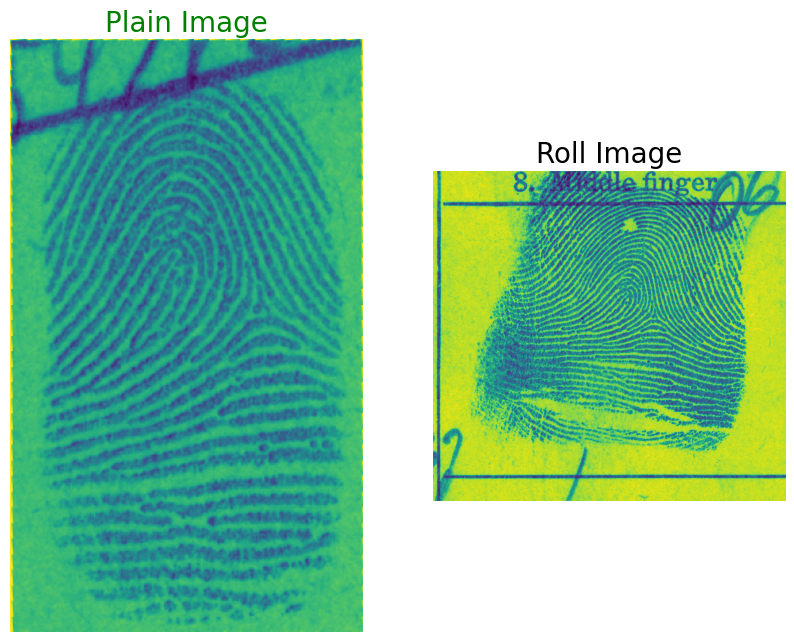

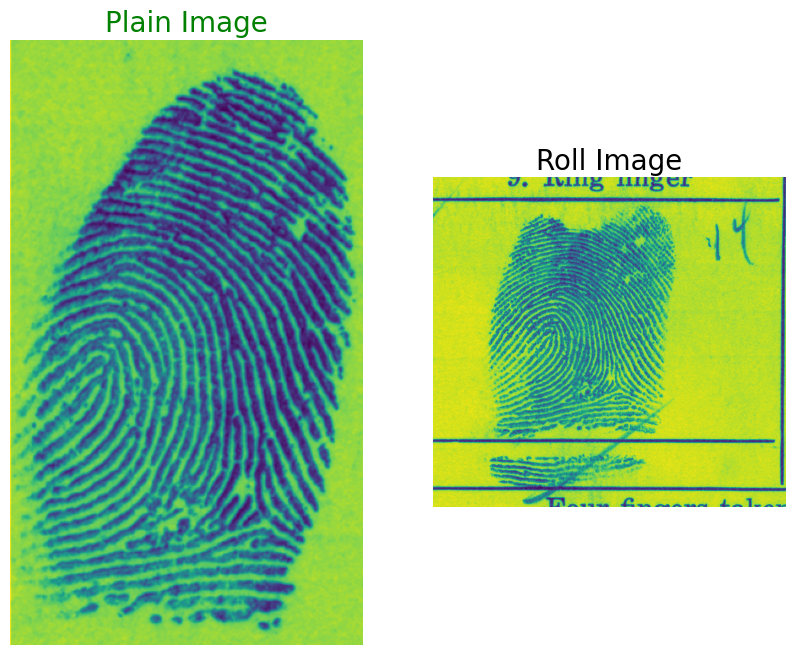

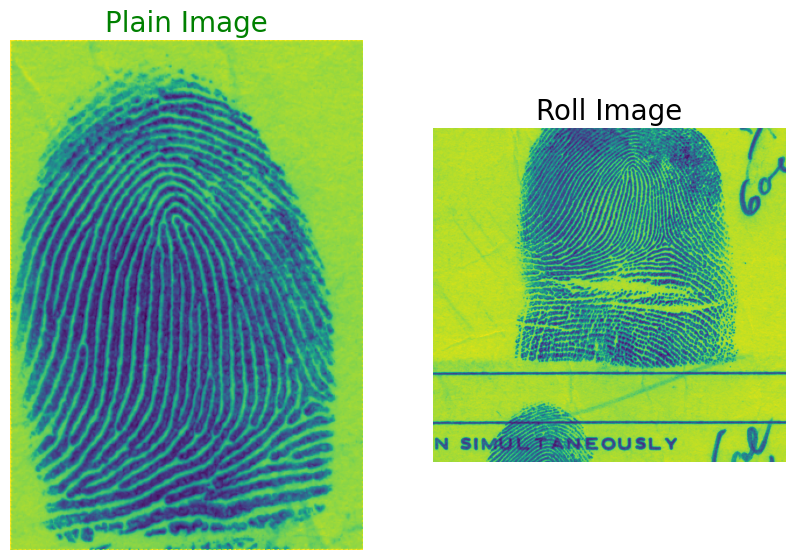

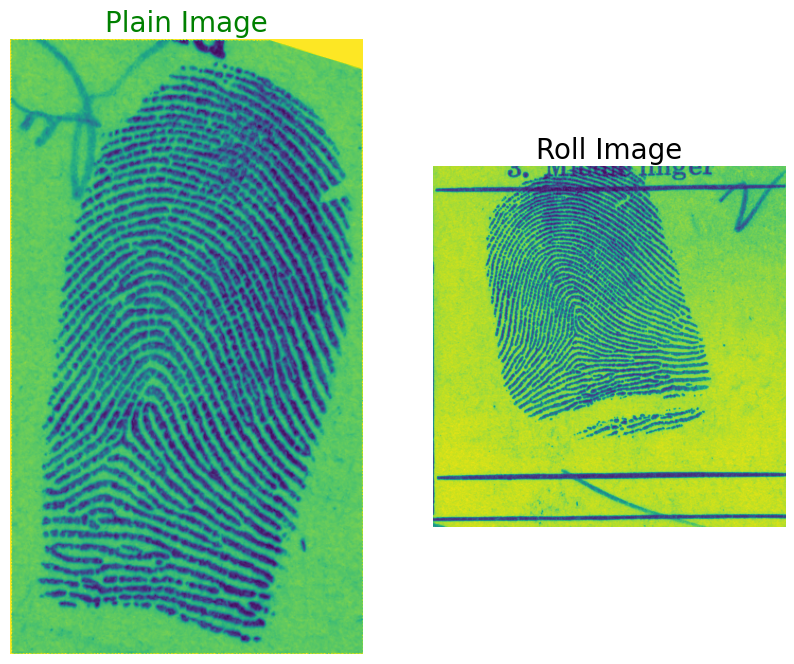

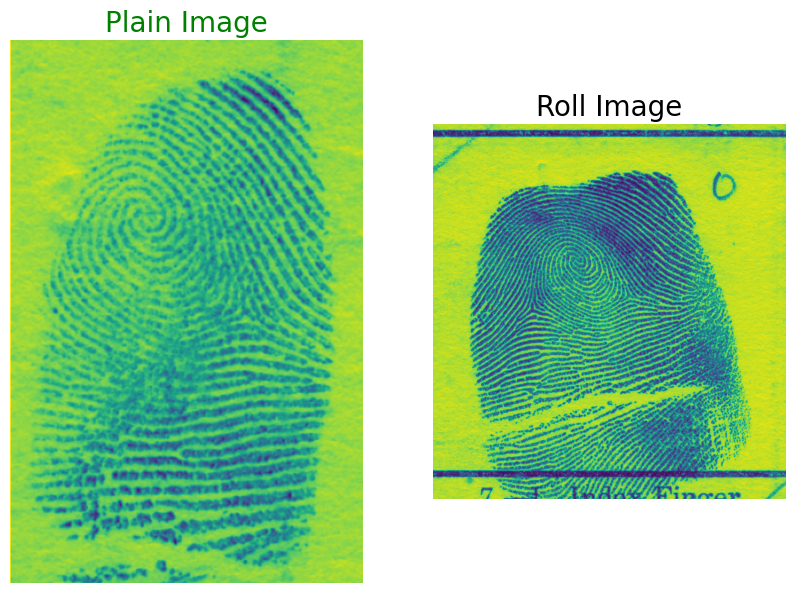

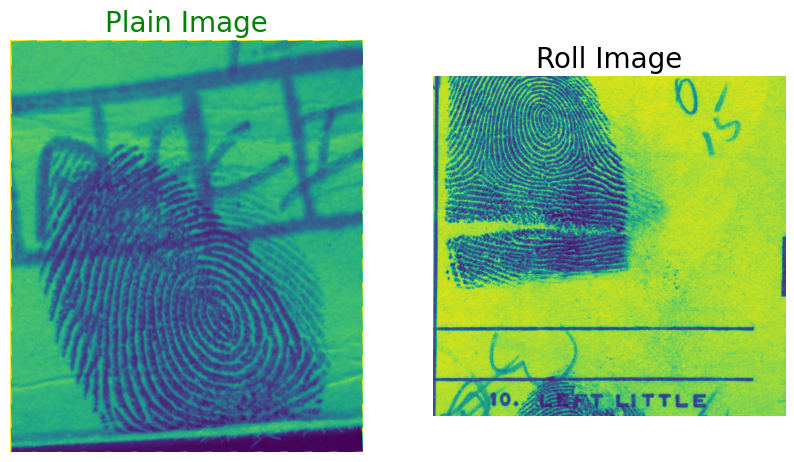

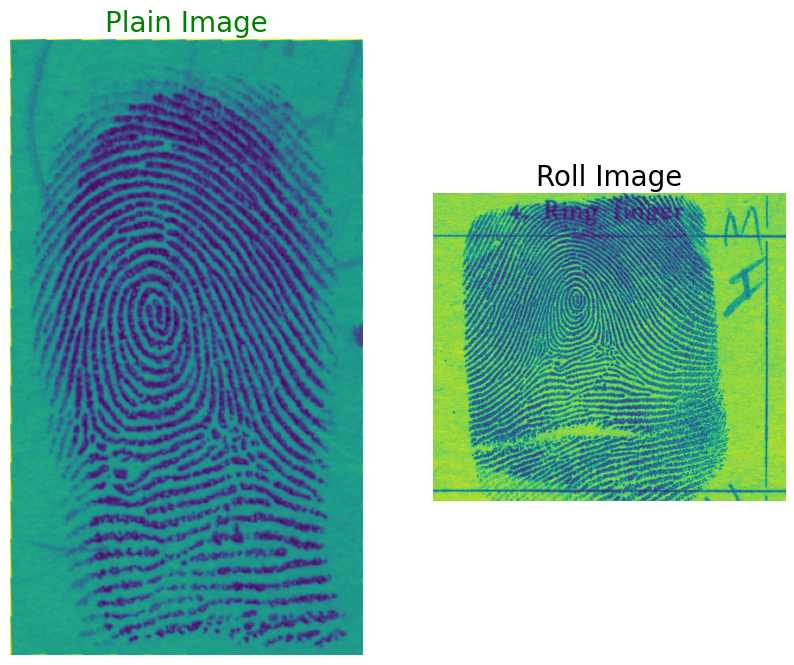

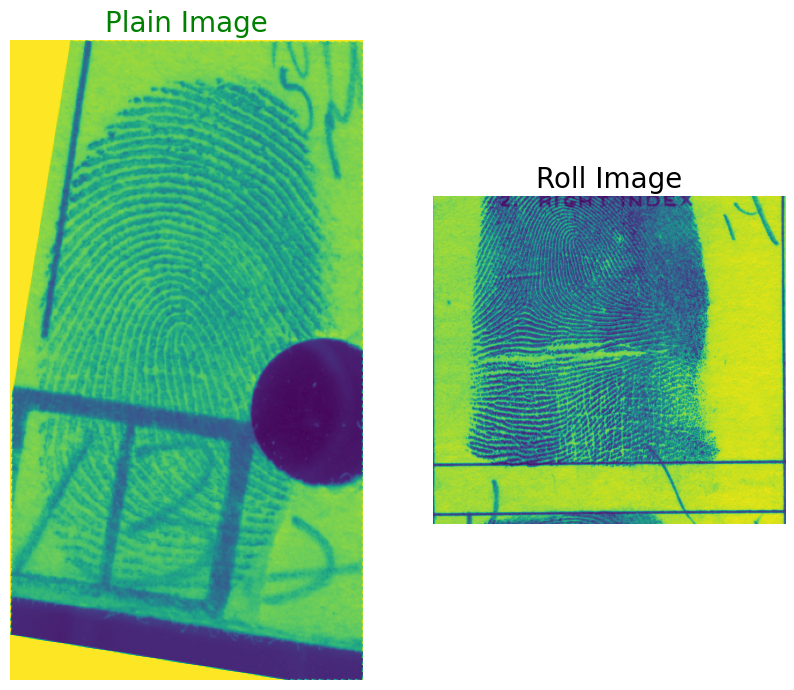

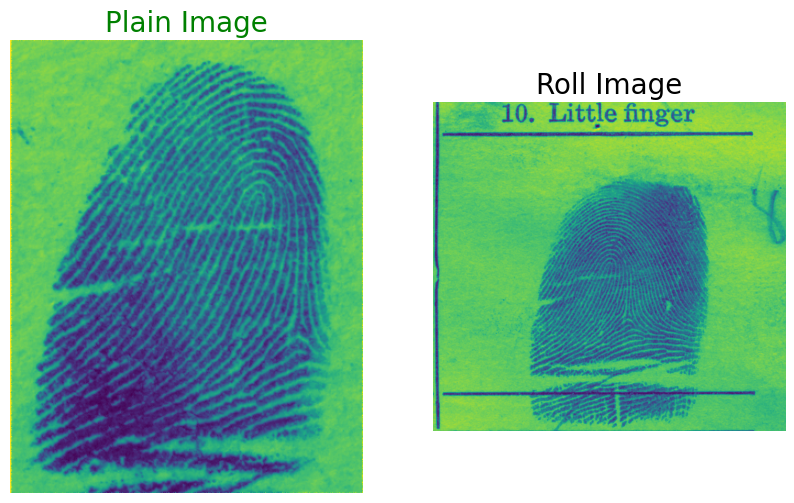

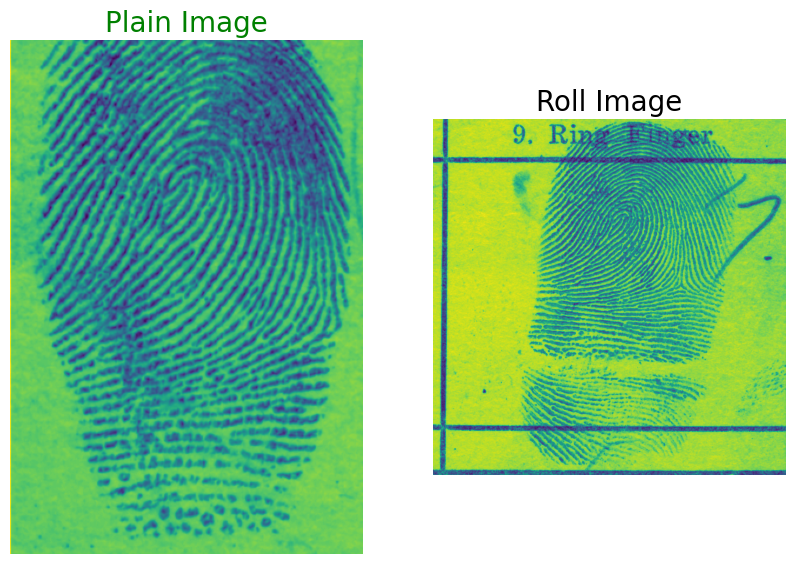

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
count=0
for data, lab in zip(pairs, labels):
  if(count==10):
    break
  if(lab==1):
    count=count+1
    image_path_0 = data[0]  # Assuming data[0] contains the file path of the first image
    image_path_1 = data[1]  # Assuming data[1] contains the file path of the second image

    img_0 = mpimg.imread(image_path_0)
    img_1 = mpimg.imread(image_path_1)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title('Plain Image', color='green', fontsize=20)
    plt.imshow(img_0)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Roll Image', color='black', fontsize=20)
    plt.imshow(img_1)
    plt.axis('off')

    plt.show()

In [7]:
import random

def split_data(pairs, labels, train_ratio, test_ratio, val_ratio):
    # Calculate the number of samples for each set
    total_samples = len(pairs)
    train_samples = int(train_ratio * total_samples)
    test_samples = int(test_ratio * total_samples)
    val_samples = int(val_ratio * total_samples)

    # Combine pairs with labels
    data = list(zip(pairs, labels))
    # Shuffle the data randomly
    random.shuffle(data)

    # Split the data into train, test, and validation sets
    train_data = data[:train_samples]
    test_data = data[train_samples:train_samples + test_samples]
    val_data = data[train_samples + test_samples:train_samples + test_samples + val_samples]

    # Unpack the pairs and labels from the split sets
    train_pairs, train_labels = zip(*train_data)
    test_pairs, test_labels = zip(*test_data)
    val_pairs, val_labels = zip(*val_data)

    return train_pairs, train_labels, test_pairs, test_labels, val_pairs, val_labels

# Generate pairs and labels using the given method
pairs, labels = generate_pairs(plain_folder, roll_folder)

# Split the data into train, test, and validation sets
train_pairs, train_labels, test_pairs, test_labels, val_pairs, val_labels = split_data(pairs, labels, 0.7, 0.2, 0.1)

# Print the number of samples in each set
print("Train samples:", len(train_pairs))
print("Test samples:", len(test_pairs))
print("Validation samples:", len(val_pairs))


00001134
02
Train samples: 2800
Test samples: 800
Validation samples: 400


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
count=0
for data, lab in zip(test_pairs, test_labels):
  if(count==10):
    break
  if(lab==1):
    count=count+1
    image_path_0 = data[0]  # Assuming data[0] contains the file path of the first image
    image_path_1 = data[1]  # Assuming data[1] contains the file path of the second image

    print(data)

['/content/drive/MyDrive/NIST/sd300a/images/500/png/plain/00001660_plain_500_10.png', '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll/00001660_roll_500_10.png']
['/content/drive/MyDrive/NIST/sd300a/images/500/png/plain/00001551_plain_500_05.png', '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll/00001551_roll_500_05.png']
['/content/drive/MyDrive/NIST/sd300a/images/500/png/plain/00001260_plain_500_04.png', '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll/00001260_roll_500_04.png']
['/content/drive/MyDrive/NIST/sd300a/images/500/png/plain/00001277_plain_500_02.png', '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll/00001277_roll_500_02.png']
['/content/drive/MyDrive/NIST/sd300a/images/500/png/plain/00001854_plain_500_08.png', '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll/00001854_roll_500_08.png']
['/content/drive/MyDrive/NIST/sd300a/images/500/png/plain/00001498_plain_500_09.png', '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll/00001498_roll

In [9]:
from tensorflow.keras.layers import Input, multiply, Lambda, add, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import random
import string
import math

In [10]:
# Create the Siamese network architecture
def create_siamese_model():
    input_1 = layers.Input(input_shape)
    input_2 = layers.Input(input_shape)

    base_network = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
    ])

    feature_1 = base_network(input_1)
    feature_2 = base_network(input_2)

    # Measure similarity between the two feature vectors
    similarity = layers.Dot(axes=1, normalize=True)([feature_1, feature_2])

    siamese_model = models.Model(inputs=[input_1, input_2], outputs=similarity)
    return siamese_model

In [11]:
import os
import random
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

In [12]:


import tensorflow as tf

tf.config.run_functions_eagerly(True)

# Create Siamese model
siamese_model = create_siamese_model()
siamese_model.compile(optimizer=optimizers.Adam(learning_rate), loss='binary_crossentropy', run_eagerly=True)



In [13]:
def data_generator(image_pairs, labels, batch_size):
    while True:
        batch_indices = np.random.choice(len(image_pairs), size=batch_size, replace=False)
        batch_pairs = [image_pairs[i] for i in batch_indices]
        batch_labels = [labels[i] for i in batch_indices]

        x1 = []
        x2 = []
        for pair in batch_pairs:
            image_1 = load_image(pair[0])
            image_2 = load_image(pair[1])
            x1.append(image_1)
            x2.append(image_2)

        x1 = np.array(x1)
        x2 = np.array(x2)
        y = np.array(batch_labels)

        yield [x1, x2], y

In [ ]:
train_generator = data_generator(train_pairs, train_labels, batch_size)
val_generator = data_generator(val_pairs, val_labels, batch_size)

# Train the Siamese model
steps_per_epoch = len(train_pairs) // batch_size
validation_steps = len(val_pairs) // batch_size

siamese_model.fit(train_generator,
                  steps_per_epoch=steps_per_epoch,
                  epochs=epochs,
                  validation_data=val_generator,
                  validation_steps=validation_steps)

# Save the trained model
siamese_model.save('siamese_model.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2800/2800 [==============================] - 3048s 1s/step - loss: 0.9749 - val_loss: 0.7365
Epoch 2/10
2800/2800 [==============================] - 1115s 398ms/step - loss: 0.5864 - val_loss: 0.6692
Epoch 3/10
2800/2800 [==============================] - 560s 200ms/step - loss: 0.5814 - val_loss: 0.7251
Epoch 4/10
2800/2800 [==============================] - 345s 123ms/step - loss: 0.4389 - val_loss: 0.7509
Epoch 5/10
2800/2800 [==============================] - 291s 104ms/step - loss: 0.3801 - val_loss: 0.9267
Epoch 6/10
2800/2800 [==============================] - 262s 93ms/step - loss: 0.3322 - val_loss: 1.0368
Epoch 7/10
2800/2800 [==============================] - 254s 91ms/step - loss: 0.3016 - val_loss: 1.2608
Epoch 8/10
2800/2800 [==============================] - 240s 86ms/step - loss: 0.1956 - val_loss: 1.5363
Epoch 9/10
2800/2800 [==============================] - 236s 84ms/step - loss: 0.1997 - val_loss: 1.4347
Epoch 10/10
2800/2800 [==============================] - 237s 

In [ ]:
import shutil
# Copy the file
shutil.copyfile('/content/siamese_model.h5', '/content/drive/MyDrive/SiameseModel/siamese_model.h5')

print('File copied successfully.')

File copied successfully.


In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the trained Siamese model
siamese_model = load_model('/content/drive/MyDrive/SiameseModel/siamese_model.h5')

# Initialize lists to store predicted labels and ground truth labels
predicted_labels = []
true_labels = []

# Iterate over the test dataset
for pair, label in zip(test_pairs, test_labels):
    # Load and preprocess the images (similar to previous examples)
    img1 = load_img(pair[0], color_mode='grayscale', target_size=(256, 256))
    img2 = load_img(pair[1], color_mode='grayscale', target_size=(256, 256))
    img1 = img_to_array(img1) / 255.0
    img2 = img_to_array(img2) / 255.0
    X_test_1 = np.expand_dims(img1, axis=0)
    X_test_2 = np.expand_dims(img2, axis=0)

    # Pass the test pair through the Siamese model and get the predicted similarity score
    prediction = siamese_model.predict([X_test_1, X_test_2])
    print(prediction)
    print(label)

    # Assign a predicted label based on the similarity score (e.g., using a threshold)
    predicted_label = 1 if prediction >= 0.9 else 0

    # Store the predicted and ground truth labels
    predicted_labels.append(predicted_label)
    true_labels.append(label)

# Convert the lists to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)



# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the test accuracy
test_accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 7s 7s/step
[[0.920382]]
1
1/1 [==============================] - 0s 26ms/step
[[0.9901281]]
1
1/1 [==============================] - 0s 30ms/step
[[0.9711286]]
1
1/1 [==============================] - 0s 25ms/step
[[0.8433291]]
0
1/1 [==============================] - 0s 27ms/step
[[0.]]
0
1/1 [==============================] - 0s 53ms/step
[[0.9096548]]
0
1/1 [==============================] - 0s 25ms/step
[[0.9985759]]
0
1/1 [==============================] - 0s 29ms/step
[[0.955498]]
1
1/1 [==============================] - 0s 25ms/step
[[0.97034895]]
1
1/1 [==============================] - 0s 25ms/step
[[0.9891224]]
0
1/1 [==============================] - 0s 25ms/step
[[0.9822395]]
1
1/1 [==============================] - 0s 26ms/step
[[0.38074297]]
0
1/1 [==============================] - 0s 45ms/step
[[0.8354456]]
0
1/1 [==============================] - 0s 25ms/step
[[0.95694447]]
1
1/1 [==============================] - 0s 25ms/step
[[0.

In [15]:
import numpy as np
from sklearn.metrics import roc_curve


# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)

# Find the index where FAR and FRR intersect (Equal Error Rate point)
eer_threshold_idx = np.argmin(np.abs(fpr - (1 - tpr)))

# Calculate the Equal Error Rate (EER) using the threshold at the intersection point
eer = (fpr[eer_threshold_idx] + (1 - tpr[eer_threshold_idx])) / 2

print("Equal Error Rate (EER):", eer)


Equal Error Rate (EER): 0.3846382247226129


In [42]:
import tensorflow as tf

# Define the custom loss function
def mse_loss(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

# Define the custom metric function
def PSNR(y_true, y_pred):
    return -10.0 * tf.math.log(tf.keras.backend.mean(tf.keras.backend.square(y_pred - y_true))) / tf.math.log(10.0)

# Load the model with custom_objects parameter
vdsrModel = tf.keras.models.load_model('/content/drive/MyDrive/VDSR.h5', custom_objects={'mse_loss': mse_loss, 'PSNR': PSNR})


In [51]:
def loadImageSecond(img):
  img = load_img(img, target_size=(256, 256))  # Load the image
  img_array = img_to_array(img)  # Convert to NumPy array

  # Remove batch dimension (assuming the shape is (1, 256, 256, 3))
  img_array = np.squeeze(img_array, axis=0)

  # Convert to grayscale (shape will become (256, 256, 1))
  gray_img = tf.image.rgb_to_grayscale(img_array)
  gray_img_array = np.array(gray_img)

  # Normalize the pixel values (optional)
  gray_img_array = gray_img_array / 255.0

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score


# Load the trained VDSR and Siamese models

siamese_model = load_model('/content/drive/MyDrive/SiameseModel/siamese_model.h5')

# Initialize lists to store predicted labels and ground truth labels
predicted_labels = []
true_labels = []

# Iterate over the test dataset
for pair, label in zip(test_pairs, test_labels):
    # Load and preprocess the original images
    img1 = load_img(pair[0], color_mode='rgb', target_size=(256, 256))
    img2 = load_img(pair[1], color_mode='rgb', target_size=(256, 256))
    img1 = img_to_array(img1) / 255.0
    img2 = img_to_array(img2) / 255.0
    X_test_1 = np.expand_dims(img1, axis=0)
    X_test_2 = np.expand_dims(img2, axis=0)

    # Enhance the first image using the VDSR model
    enhanced_img0 = vdsrModel.predict(X_test_1)
    enhanced_img0 = np.reshape(enhanced_img0, (256, 256, 3))
    enhanced_img1 = vdsrModel.predict(X_test_2)
    enhanced_img1 = np.reshape(enhanced_img1, (256, 256, 3))

    # Preprocess the enhanced image and the original image for Siamese model
    #enhanced_img = np.squeeze(enhanced_img)  # Remove batch dimension
    #enhanced_img = np.expand_dims(enhanced_img, axis=-1)  # Add channel dimension
    #X_test_1_enhanced = np.expand_dims(enhanced_img, axis=0)
    #X_test_1_enhanced=loadImageSecond(X_test_1_enhanced)
    import cv2
    # Convert the enhanced images to grayscale
    enhanced_img0_gray = cv2.cvtColor(enhanced_img0, cv2.COLOR_RGB2GRAY)
    enhanced_img1_gray = cv2.cvtColor(enhanced_img1, cv2.COLOR_RGB2GRAY)

    # Add the channel dimension for grayscale images
    X_test_0_enhanced = np.expand_dims(enhanced_img0_gray, axis=-1)
    X_test_1_enhanced = np.expand_dims(enhanced_img1_gray, axis=-1)

    # Reshape the images to match the Siamese model's input shape
    X_test_0_enhanced = np.expand_dims(X_test_0_enhanced, axis=0)
    X_test_1_enhanced = np.expand_dims(X_test_1_enhanced, axis=0)
    # Pass the enhanced image and the original image through the Siamese model
    prediction = siamese_model.predict([X_test_0_enhanced, X_test_1_enhanced])
    print(prediction)
    print(label)

    # Assign a predicted label based on the similarity score (e.g., using a threshold)
    predicted_label = 1 if prediction >= 0.9 else 0

    # Store the predicted and ground truth labels
    predicted_labels.append(predicted_label)
    true_labels.append(label)

# Convert the lists to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the test accuracy
test_accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy:", test_accuracy)


1/1 [==============================] - 0s 58ms/step
[[0.92096686]]
1
1/1 [==============================] - 0s 36ms/step
[[0.99468523]]
1
1/1 [==============================] - 0s 36ms/step
[[0.9718044]]
1
1/1 [==============================] - 0s 37ms/step
[[0.89627415]]
0
1/1 [==============================] - 0s 54ms/step
[[0.]]
0
1/1 [==============================] - 0s 39ms/step
[[0.9597181]]
0
1/1 [==============================] - 0s 39ms/step
[[0.99424803]]
0
1/1 [==============================] - 0s 37ms/step
[[0.9983764]]
1
1/1 [==============================] - 0s 38ms/step
[[0.9199156]]
1
1/1 [==============================] - 0s 26ms/step
[[0.9892424]]
0
1/1 [==============================] - 0s 25ms/step
[[0.98142266]]
1
1/1 [==============================] - 0s 30ms/step
[[0.]]
0
1/1 [==============================] - 0s 27ms/step
[[0.8487236]]
0
1/1 [==============================] - 0s 28ms/step
[[0.981132]]
1
1/1 [==============================] - 0s 25ms/step
[[0.87

In [65]:
import numpy as np
from sklearn.metrics import roc_curve


# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)

# Find the index where FAR and FRR intersect (Equal Error Rate point)
eer_threshold_idx = np.argmin(np.abs(fpr - (1 - tpr)))

# Calculate the Equal Error Rate (EER) using the threshold at the intersection point
eer = (fpr[eer_threshold_idx] + (1 - tpr[eer_threshold_idx])) / 2

print("Equal Error Rate (EER):", eer)

Equal Error Rate (EER): 0.37659009220190653
